# Laboratorio 2 – Ejercicio 2: Modelo SIR con Vacunación

### Objetivo del Ejercicio

El objetivo de este ejercicio es comprender cómo los **retrasos en la percepción** dentro de un sistema de retroalimentación pueden generar **comportamientos oscilatorios**, como sobreimpulsos o correcciones excesivas.

A través de la simulación de un sistema con un stock real y un stock percibido (afectado por un retraso tipo Erlang), se busca visualizar cómo las decisiones tomadas con información desfasada afectan la estabilidad del sistema.

Este modelo permite:

- Explorar la dinámica entre percepción y acción.
- Observar gráficamente las oscilaciones provocadas por los retrasos.
- Analizar el impacto del ruido o incertidumbre en los datos percibidos.
- Reflexionar sobre situaciones reales donde los retrasos en la información generan decisiones inestables (como en pandemias o ciclos económicos).

## Imports y funciones auxiliares

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


## Descripción del Modelo

Se modelará un sistema con dos "stocks":

- **Stock Real**: Representa el estado real del sistema que intenta alcanzar un objetivo (por ejemplo, 50 unidades).
- **Stock Percibido**: Representa cómo el sistema percibe el estado real, pero con un retraso tipo Erlang de 15 días.

La retroalimentación se basa en el stock percibido, no en el real. La fórmula del flujo de ajuste es:

**flujo = (objetivo - percibido) / retraso**

Se simulará el sistema durante 200 días y se graficarán ambos stocks para observar las oscilaciones provocadas por el retraso.


In [ ]:
def erlang_delay(signal, delay_days, shape=2):
    """
    Aplica un retraso de Erlang al vector de señal original.
    """
    # Crear kernel Erlang (PDF)
    t = np.arange(0, 5 * delay_days)
    kernel = (t ** (shape - 1)) * np.exp(-t / delay_days)
    kernel /= np.sum(kernel)  # Normalizar
    delayed_signal = np.convolve(signal, kernel, mode='full')[:len(signal)]
    return delayed_signal


## Simulación del Sistema

In [ ]:
# Parámetros
dias = 200
objetivo = 50
retraso_percepcion = 15
retraso_ajuste = 10

# Inicialización
stock_real = np.zeros(dias)
flujo = np.zeros(dias)

# Estado inicial
stock_real[0] = 0

# Simulación (sin ruido)
for t in range(1, dias):
    # Stock percibido con retraso
    percibido = erlang_delay(stock_real, retraso_percepcion)

    # Flujo basado en percepción desfasada
    if t >= 1:
        flujo[t] = (objetivo - percibido[t - 1]) / retraso_ajuste
        stock_real[t] = stock_real[t - 1] + flujo[t]


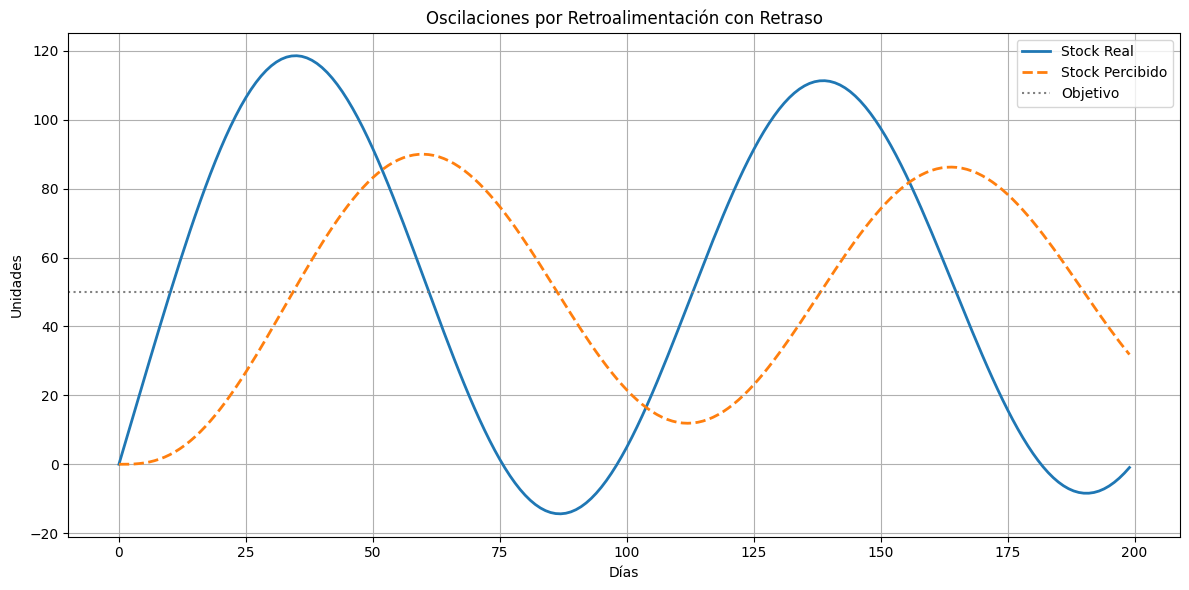

In [ ]:
# Volver a calcular la señal percibida final para graficar
stock_percibido = erlang_delay(stock_real, retraso_percepcion)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(stock_real, label="Stock Real", linewidth=2)
plt.plot(stock_percibido, label="Stock Percibido", linestyle='--', linewidth=2)
plt.axhline(objetivo, color='gray', linestyle=':', label='Objetivo')
plt.title("Oscilaciones por Retroalimentación con Retraso")
plt.xlabel("Días")
plt.ylabel("Unidades")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Observaciones

- Se observan oscilaciones en el stock real alrededor del objetivo.
- Esto ocurre porque el sistema reacciona con base en una percepción atrasada del estado real.
- Cuanto mayor sea el retraso o menor el tiempo de ajuste, más grandes serán las oscilaciones.


(Opcional): Añadimos ruido a la percepción

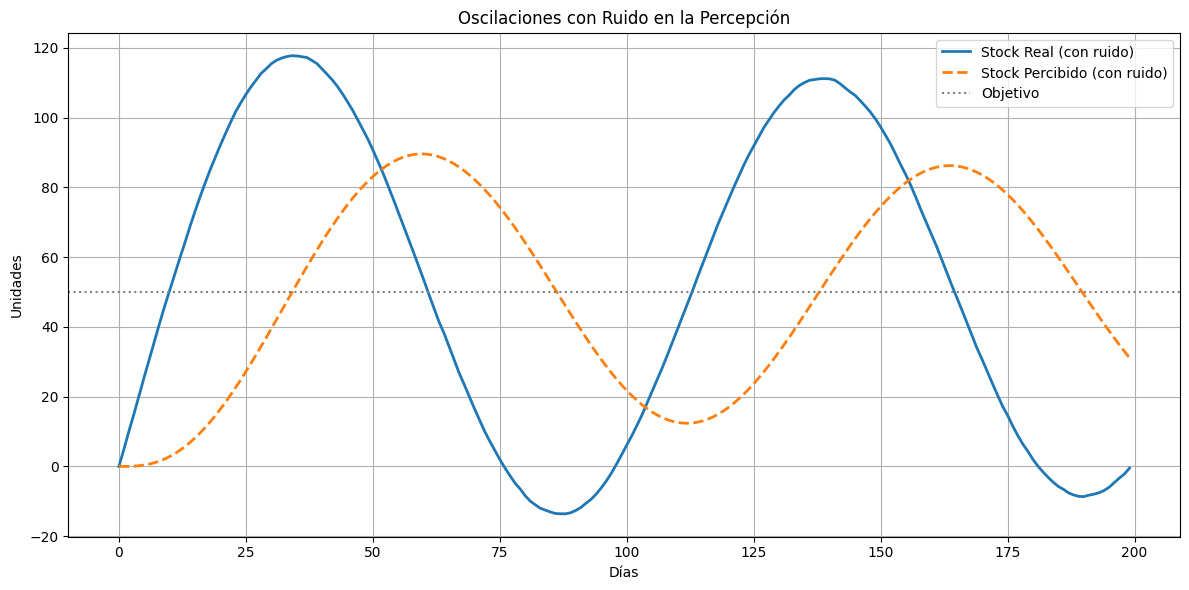

In [ ]:
# Añadir ruido a la percepción
ruido = np.random.normal(0, 1.5, dias)
stock_real_ruido = np.zeros(dias)
flujo_ruido = np.zeros(dias)

stock_real_ruido[0] = 0

for t in range(1, dias):
    percibido_con_ruido = erlang_delay(stock_real_ruido, retraso_percepcion) + ruido
    if t >= 1:
        flujo_ruido[t] = (objetivo - percibido_con_ruido[t - 1]) / retraso_ajuste
        stock_real_ruido[t] = stock_real_ruido[t - 1] + flujo_ruido[t]

stock_percibido_con_ruido = erlang_delay(stock_real_ruido, retraso_percepcion)

# Graficar con ruido
plt.figure(figsize=(12,6))
plt.plot(stock_real_ruido, label="Stock Real (con ruido)", linewidth=2)
plt.plot(stock_percibido_con_ruido, label="Stock Percibido (con ruido)", linestyle='--', linewidth=2)
plt.axhline(objetivo, color='gray', linestyle=':', label='Objetivo')
plt.title("Oscilaciones con Ruido en la Percepción")
plt.xlabel("Días")
plt.ylabel("Unidades")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusiones

- El sistema responde a los cambios con cierto atraso debido a la percepción desfasada.
- Esto causa un comportamiento oscilatorio, especialmente si los ajustes se hacen de forma frecuente.
- Al introducir ruido en la percepción, las oscilaciones se vuelven más inestables.
- Para evitar estos comportamientos, es útil reducir los retrasos de percepción o hacer ajustes más suaves y menos frecuentes.


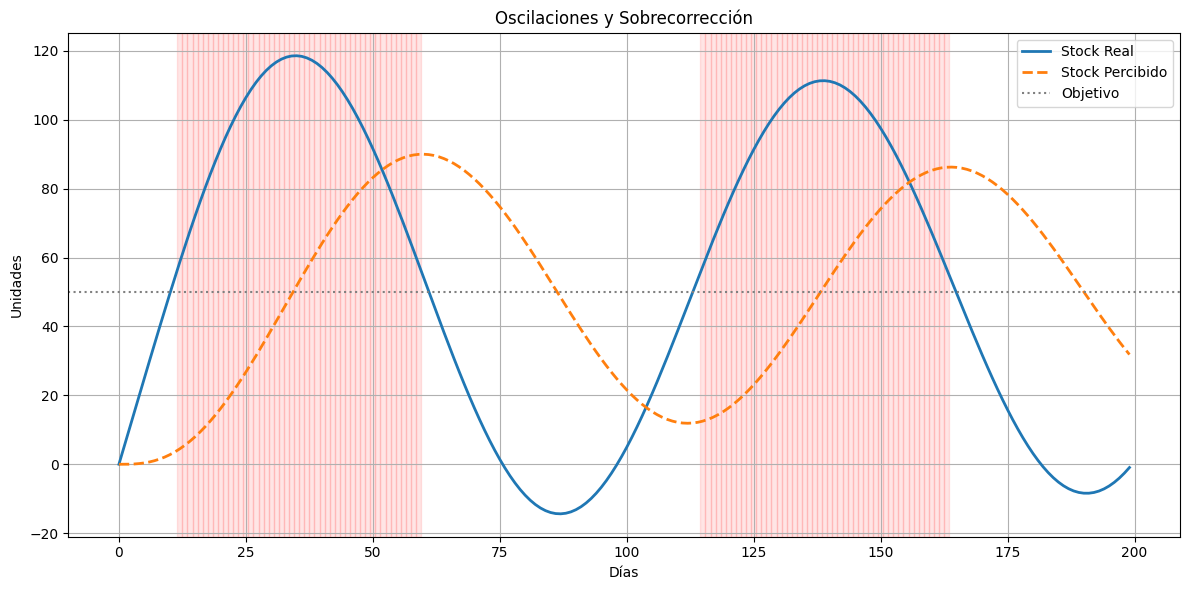

In [ ]:
# Ejemplo de resaltado de sobrecorrección (cuando stock_real > objetivo + umbral)
umbral = 5
sobrecorreccion = stock_real > (objetivo + umbral)

plt.figure(figsize=(12,6))
plt.plot(stock_real, label="Stock Real", linewidth=2)
plt.plot(stock_percibido, label="Stock Percibido", linestyle='--', linewidth=2)
plt.axhline(objetivo, color='gray', linestyle=':', label='Objetivo')

# Resaltar sobreimpulso
for i in range(1, len(sobrecorreccion)):
    if sobrecorreccion[i]:
        plt.axvspan(i-0.5, i+0.5, color='red', alpha=0.1)

plt.title("Oscilaciones y Sobrecorrección")
plt.xlabel("Días")
plt.ylabel("Unidades")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
